In [545]:
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import rpy2.robjects as robjects
import matplotlib.pyplot as plt
import pandas as pd
random.seed(5)

/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


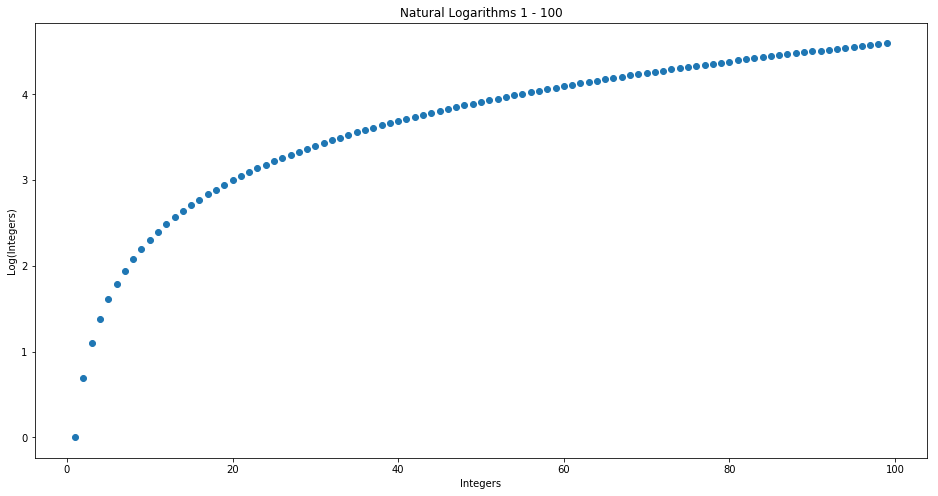

In [557]:
prev_log = 0
logs = []
count = []
for i in range (100):
    cur_log = np.log(i)
    logs.append(cur_log)
    count.append(i)
    # print(i, ' : ', cur_log, ' : ', (cur_log - prev_log))
    prev_log = cur_log


plt.figure(figsize=(16,8))
plt.xlabel('Integers')
plt.ylabel('Log(Integers)')
plt.title('Natural Logarithms 1 - 100')
plt.scatter(count, logs)
plt.savefig('natural_logs_scatter.png')
plt.show()

| Input Range  | Output Range |
|--------------|--------------|
| 1            | 0            |
| e            | 1            |
| 7.389        | 2            |
| 20.086       | 3            |
| 54.598       | 4            |
| 148.413      | 5            |

In [ ]:
<pre class="prettyprint lang-py linenums">

</pre>

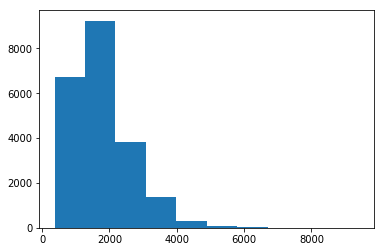

Kurtosis:  3.40551976108
Skewness:  1.44743423539


In [558]:
df = pd.read_csv('kc_house_data.csv')
X = pd.Series(df.sqft_above)
plt.hist(X)
plt.savefig('right_skewed.png')
plt.show()
print('Kurtosis: ', X.kurtosis())
print('Skewness: ', X.skew())

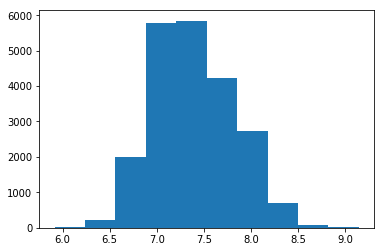

Kurtosis:  -0.33393790737
Skewness:  0.259698928531


In [559]:
X_log = np.log(X)
plt.hist(X_log)
plt.savefig('right_skewed_log.png')
plt.show()
print('Kurtosis: ', X_log.kurtosis())
print('Skewness: ', X_log.skew())

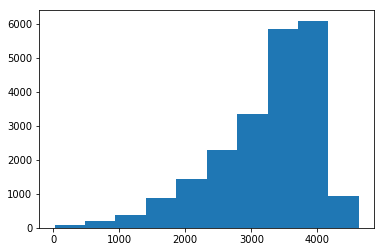

Kurtosis:  0.921262477786
Skewness:  -1.10121182177


In [560]:
neg_X = (X * -1) + 5000
neg_X = neg_X.loc[neg_X > 0]
plt.hist(neg_X)
plt.savefig('left_skewed.png')
plt.show()
print('Kurtosis: ', neg_X.kurtosis())
print('Skewness: ', neg_X.skew())

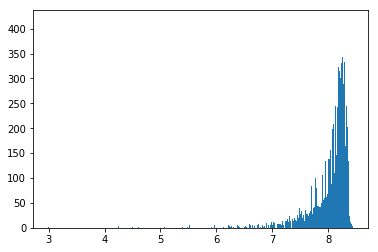

Kurtosis:  19.2428237715
Skewness:  -3.219972198


In [561]:
log_neg_X = np.log(neg_X)
plt.hist(log_neg_X, bins=1000)
plt.savefig('left_skewed_log.png')
plt.show()
print('Kurtosis: ', log_neg_X.kurtosis())
print('Skewness: ', log_neg_X.skew())

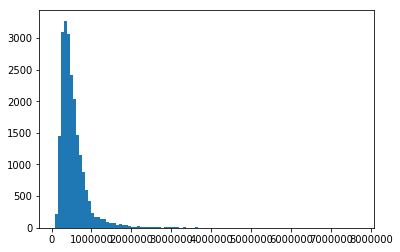

In [562]:
y = pd.Series(df.price)
plt.hist(y, bins=100)
plt.show()

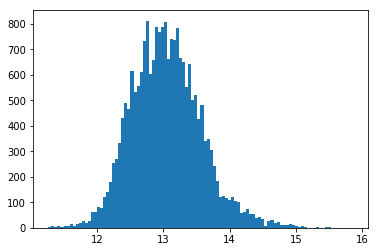

In [563]:
y_log = np.log(y)
plt.hist(y_log, bins=100)
plt.show()

In [564]:
import statsmodels.api as sm
# X = sm.add_constant(X)
model = sm.OLS(y_log, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.141e+05
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:57:40   Log-Likelihood:                -66291.
No. Observations:               21597   AIC:                         1.326e+05
Df Residuals:                   21596   BIC:                         1.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sqft_above     0.0061    1.8e-05    337.783      0.000       0.006       0.006
==============================================================================
Omnibus:                     6003.151   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18062.990
Skew:                          -1.443   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [577]:
X.head()

0    1180
1    2170
2     770
3    1050
4    1680
Name: sqft_above, dtype: int64

In [566]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [576]:
error = []
for i in range(len(y)):
    b1 = np.exp(X.iloc[i] * model.params[0])
    error.append(b1 - y.iloc[i])
print(np.mean(error))

3.26463822971e+20


In [571]:
error = []
constant = np.exp(model.params[0])
for i in range(len(y)):
    b1 = np.exp(X.sqft_above.iloc[i] * model.params[1])
#     print(b1, constant)
    error.append((b1 * constant) - y.iloc[i])
print(np.mean(error))


AttributeError: 'Series' object has no attribute 'sqft_above'